In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
import math
import geopy.distance
import pymysql

In [4]:
df_art_sci = pd.read_csv("Art_sci_listings_SP2023.txt")

In [5]:
df_art_sci.head()
df_art_sci["school"] = "Art_Sci"

In [6]:
df_art_sci

,Days,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school
0,M-W----,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
1,MT-R---,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
2,M-W----,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
3,-T-R---,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
4,M-W----,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
...,...,...,...,...,...,...,...,...,...
2905,-T-R---,1:00P-2:20P,Wrighton / 201,15,12,0,RELIGION AND POLITICS(L57),,Art_Sci
2906,--W----,2:00P-4:50P,Seigle / L003,20,4,0,RELIGION AND POLITICS(L57),,Art_Sci
2907,-T-----,2:30P-5:20P,Seigle / 206,12,9,0,RELIGION AND POLITICS(L57),,Art_Sci
2908,--W----,2:00P-4:50P,Umrath / 116,15,3,0,RELIGION AND POLITICS(L57),,Art_Sci


In [7]:
df_arch = pd.read_csv("Architecture_SP2023.txt")
df_arch["school"] = "Architecture"

In [8]:
df_Art = pd.read_csv("Art_SP2023.txt")
df_Art["school"] = "Art"

In [9]:
df_Bus = pd.read_csv("Business_SP2023.txt")
df_Bus["school"] = "Business"

In [10]:
df_Eng = pd.read_csv("Engineering_SP2023.txt")
df_Eng["school"] = "Engineering"

In [11]:
df_Eng_cont = pd.read_csv("Engineering_cont_SP2023.txt")
df_Eng_cont["school"] = "Engineering Continued"

In [12]:
df_inter = pd.read_csv("Interdisciplinary_SP2023.txt")
df_inter["school"] = "Interdisciplinary"

In [13]:
df_Law = pd.read_csv("LAW_SP2023.txt")
df_Law["school"] = "Law"

In [14]:
df_social = pd.read_csv("Social_Work_SP2023.txt")
df_social["school"] = "Social Work"

In [15]:
df_total = pd.concat([df_art_sci, df_arch, df_Art, df_Eng, df_Eng_cont, df_inter, df_Law, df_social], ignore_index = True, join = "outer")

In [16]:
df_total

,Days,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school
0,M-W----,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
1,MT-R---,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
2,M-W----,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
3,-T-R---,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
4,M-W----,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci
...,...,...,...,...,...,...,...,...,...
5155,-T-----,1:00P-4:00P,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work
5156,-T-----,1:00P-4:00P,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work
5157,--W----,5:30P-8:30P,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work
5158,---R---,9:00A-11:52A,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work


In [17]:
df_temp_total = df_total[df_total['Time'].str.contains("12:50P")]
df_temp_total = df_temp_total[df_temp_total['Days'].str.contains("M")]
np.sum(np.array(list(df_temp_total['Enrolled'])))

5640

In [18]:
df_filtered = df_total.copy()

In [19]:
for col in ['Days','Time','Building and Room']:
    print(col)
    df_filtered = df_filtered[(df_filtered[col]).str.contains("TBA") == False]

Days
Time
Building and Room


In [20]:
df_days = [[],[],[],[],[]]#2d array to encode the days as their own columns
for index,row in df_filtered.iterrows():
    if(("M") in row[0]):
        df_days[0].append(1)
    else:
        df_days[0].append(0)
    if(("T") in row[0]):
        df_days[1].append(1)
    else:
        df_days[1].append(0)
    if(("W") in row[0]):
        df_days[2].append(1)
    else:
        df_days[2].append(0)
    if(("R") in row[0]):
        df_days[3].append(1)
    else:
        df_days[3].append(0)
    if(("F") in row[0]):
        df_days[4].append(1)
    else:
        df_days[4].append(0)

In [21]:
df_filtered["Monday"] = df_days[0]
df_filtered["Tuesday"] = df_days[1]
df_filtered["Wednesday"] = df_days[2]
df_filtered["Thursday"] = df_days[3]
df_filtered["Friday"] = df_days[4]

In [22]:
df_filtered.drop(['Days'],axis = 1, inplace = True)

In [23]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school,Monday,Tuesday,Wednesday,Thursday,Friday
0,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0
1,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,1,0,1,0
2,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0
3,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,0,1,0,1,0
4,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1:00P-4:00P,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0
5156,1:00P-4:00P,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0
5157,5:30P-8:30P,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work,0,0,1,0,0
5158,9:00A-11:52A,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work,0,0,0,1,0


In [24]:
times = [[]]#possible 3d array with outer set being the time per class and the inner being the 
#different times for each class (still corresponds with a single number of students though)

for index,row in df_filtered.iterrows():
    inter_time = row[0].split("-")
    for i_time in inter_time:
        i_time.split("A")
    times.append(row[0].split("-"))
    

In [25]:
mod_times = []
just_concat = False
for index,row in df_filtered.iterrows():
    inter_time = row[0].split("-")
    mod_times.append([])
    for i_time in inter_time:
#         print("in here")
#         print(i_time)
        i_time = i_time.strip()
#         if just_concat:
#             mod_times[-1][-1].append(i_time)
#             just_concat = False
#             continue
        if len(i_time) > 6:#multiple times within the same time
            index = i_time.find("A")
            if(index==-1 or index==len(i_time)-1):#if not in the string or in the last place we want to try the other one
                index = i_time.find("P")
            t1 = i_time[0:index+1]
            t2 = i_time[index+1:]
#             inter_list = [t1,t2]
            #if not just_concat:      
            mod_times[-1][-1].append(t1)
            mod_times[-1].append([t2])
            #else:
                
            just_concat = True
        else:
#             if not just_concat:
#                 mod_times[-1].append([i_time])
#             else:
#                 mod_times[-1][-1].append(i_time)
            if (len(mod_times[-1])==0):#first opportunity
                mod_times[-1].append([i_time])
            elif (len(mod_times[-1][-1]) < 7):# only one thing in there so append the next
                mod_times[-1][-1].append(i_time)
            just_concat = False
# for class_times in mod_times:
#     print(class_times)
#     for times in class_times:
#         print(times)
#         times = [*set(times)]
# #     times.append(row[0].split("-"))
# print(mod_times)
# print(len(mod_times))

In [26]:
float_times = []
for class_times in mod_times:
    float_times.append([])
    for times in class_times:
        float_times[-1].append([])
        for time in times:
            #print(time)
            time = time.replace(":",".")
            index = time.find("P")
#             print("time is " ,time[:-1])
            if index!=-1:
                if (time.find("12"))==-1:
                    time = float(time[:-1]) + 12
                else:
                    time = float(time[:-1])
            else:
                time = float(time[:-1])
            float_times[-1][-1].append(time)
# print(float_times)

In [27]:
df_filtered['times'] = float_times

In [28]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school,Monday,Tuesday,Wednesday,Thursday,Friday,times
0,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,"[[13.0, 14.2]]"
1,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,1,0,1,0,"[[11.3, 12.5]]"
2,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,"[[17.0, 18.2]]"
3,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,0,1,0,1,0,"[[13.0, 14.2]]"
4,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,"[[14.3, 15.5]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1:00P-4:00P,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,"[[13.0, 16.0]]"
5156,1:00P-4:00P,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,"[[13.0, 16.0]]"
5157,5:30P-8:30P,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work,0,0,1,0,0,"[[17.3, 20.3]]"
5158,9:00A-11:52A,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work,0,0,0,1,0,"[[9.0, 11.52]]"


In [29]:
start_times = []
end_times = []
counter = 0
for class_times in float_times:
    if (len(class_times) > 1):
        counter = counter + 1
    stimes = []
    etimes = []
    for times in class_times:
        stimes.append(times[0])
        etimes.append(times[1])
    start_times.append(stimes)
    end_times.append(etimes)
# print(len(start_times))
# print(len(end_times))

In [30]:
df_filtered['start_times'] = start_times
df_filtered['end_times'] = end_times
df_filtered.drop(['times'], inplace = True, axis = 1)
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[13.0],[14.2]
1,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,1,0,1,0,[11.3],[12.5]
2,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[17.0],[18.2]
3,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,0,1,0,1,0,[13.0],[14.2]
4,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[14.3],[15.5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1:00P-4:00P,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5156,1:00P-4:00P,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5157,5:30P-8:30P,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work,0,0,1,0,0,[17.3],[20.3]
5158,9:00A-11:52A,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work,0,0,0,1,0,[9.0],[11.52]


In [31]:
df_filtered = df_filtered[(df_filtered['Enrolled'])> 0]

In [32]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,1:00P-2:20P,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[13.0],[14.2]
1,11:30A-12:50P,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,1,0,1,0,[11.3],[12.5]
2,5:00P-6:20P,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[17.0],[18.2]
3,1:00P-2:20P,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,0,1,0,1,0,[13.0],[14.2]
4,2:30P-3:50P,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[14.3],[15.5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1:00P-4:00P,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5156,1:00P-4:00P,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5157,5:30P-8:30P,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work,0,0,1,0,0,[17.3],[20.3]
5158,9:00A-11:52A,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work,0,0,0,1,0,[9.0],[11.52]


In [33]:
df_filtered.drop(['Time'], inplace = True, axis = 1)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_16796\1437597367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Time'], inplace = True, axis = 1)


In [34]:
df_filtered

,Building and Room,Seats,Enrolled,Waits,Dept_name,Unnamed: 7,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,Seigle / 210,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[13.0],[14.2]
1,Seigle / 208,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,1,0,1,0,[11.3],[12.5]
2,Seigle / 104,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[17.0],[18.2]
3,Seigle / 109,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,0,1,0,1,0,[13.0],[14.2]
4,Seigle / 106,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),,Art_Sci,1,0,1,0,0,[14.3],[15.5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,Goldfarb / 124,20,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5156,Goldfarb / 38,18,12,0,Practice Methods(S60),,Social Work,0,1,0,0,0,[13.0],[16.0]
5157,Goldfarb / 246,16,8,0,Practice Methods(S60),,Social Work,0,0,1,0,0,[17.3],[20.3]
5158,AB Law Bldg / 320,20,17,0,Practice Methods(S60),,Social Work,0,0,0,1,0,[9.0],[11.52]


In [35]:
counter = 0
buildings = []
rooms = []
for index,row in df_filtered.iterrows():
    splits = row[0].split("/")
    #it can't be the first or last iterations so just skip those, otherwise if len(splits) > 2 then it's being taught in
    #multiple buildings, if this is true then iterate from i = 1 to len - 2 (because skip last) and find the index of the 
    #last number (all rooms end in a number) and split on the index after that, then strip, the add to the rquisite array
    #the final structure of the arrays at the end should be 2d with each index being the possible buildings or rooms the 
    #class is taught in 
    if(len(splits)==2):
        buildings.append([splits[0].strip()])
        rooms.append([splits[1].strip()])
    else:    
        buildings.append([splits[0].strip()])
        rooms.append([])
        for i in range(1,len(splits)-1):#skip the first and last iterations
            max_val = -2
            for j in range(10):
                if (splits[i].rfind(str(j))) > max_val:
                    max_val = splits[i].rfind(str(j))
            room = (splits[i][:max_val+1]).strip()
            building = (splits[i][max_val+1:]).strip()
            buildings[-1].append(building)
            rooms[-1].append(room)
#             print(room)
#             print(max_val)
#             print(row[0])
#             print(buildings[-1])
#             print(rooms[-1])
#             print()
        rooms[-1].append(splits[len(splits)-1].strip())
#         print(rooms[-1])

In [36]:
df_filtered['rooms'] = rooms

C:\Users\jeeva\AppData\Local\Temp\ipykernel_16796\1635988171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rooms'] = rooms


In [37]:
df_filtered['buildings'] = buildings

C:\Users\jeeva\AppData\Local\Temp\ipykernel_16796\3014749223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['buildings'] = buildings


In [38]:
df_filtered.drop(['Building and Room'], axis = 1, inplace = True)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_16796\2954183948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Building and Room'], axis = 1, inplace = True)


In [39]:
df_filtered.drop(['Unnamed: 7'], axis = 1, inplace = True)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_16796\825681005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Unnamed: 7'], axis = 1, inplace = True)


In [40]:
#end preprocessing start manipulation

In [41]:
df_filtered

,Seats,Enrolled,Waits,Dept_name,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times,rooms,buildings
0,10,1,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),Art_Sci,1,0,1,0,0,[13.0],[14.2],[210],[Seigle]
1,15,9,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),Art_Sci,1,1,0,1,0,[11.3],[12.5],[208],[Seigle]
2,15,11,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),Art_Sci,1,0,1,0,0,[17.0],[18.2],[104],[Seigle]
3,19,7,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),Art_Sci,0,1,0,1,0,[13.0],[14.2],[109],[Seigle]
4,10,2,0,AFRICAN AND AFRICAN-AMERICAN STUDIES(L90),Art_Sci,1,0,1,0,0,[14.3],[15.5],[106],[Seigle]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,20,12,0,Practice Methods(S60),Social Work,0,1,0,0,0,[13.0],[16.0],[124],[Goldfarb]
5156,18,12,0,Practice Methods(S60),Social Work,0,1,0,0,0,[13.0],[16.0],[38],[Goldfarb]
5157,16,8,0,Practice Methods(S60),Social Work,0,0,1,0,0,[17.3],[20.3],[246],[Goldfarb]
5158,20,17,0,Practice Methods(S60),Social Work,0,0,0,1,0,[9.0],[11.52],[320],[AB Law Bldg]


In [42]:
# poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
# print(poss_times)

In [43]:
def students_in_class_getting_out_going_in():
    poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
    times_list = []#array with the number of kids in class at each time as the length
    dfs_times = [[],[],[],[],[]] 
    dfs_out = [[],[],[],[],[]]
    dfs_in = [[],[],[],[],[]]
    for i in poss_times:
        num_students = 0
        times_t = [0] * 5
        times_o = [0] * 5
        times_i = [0] * 5
        for index,row in df_filtered.iterrows():
            #go through each row and see if i is between the end and start time
            for j in range(len(row[10])):
                if (i>=row[10][j] and i<=row[11][j]):
                    if  row[5]==1:
                        times_t[0] = times_t[0] + row[1]
                    if  row[6]==1:
                        times_t[1] = times_t[1] + row[1]
                    if  row[7]==1:
                        times_t[2] = times_t[2] + row[1]
                    if  row[8]==1:
                        times_t[3] = times_t[3] + row[1]
                    if  row[9]==1:
                        times_t[4] = times_t[4] + row[1]
                if (i==row[11][j]):
                    if  row[5]==1:
                        times_o[0] = times_o[0] + row[1]
                    if  row[6]==1:
                        times_o[1] = times_o[1] + row[1]
                    if  row[7]==1:
                        times_o[2] = times_o[2] + row[1]
                    if  row[8]==1:
                        times_o[3] = times_o[3] + row[1]
                    if  row[9]==1:
                        times_o[4] = times_o[4] + row[1]
                if (i==row[10][j]):
                    if  row[5]==1:
                        times_i[0] = times_i[0] + row[1]
                    if  row[6]==1:
                        times_i[1] = times_i[1] + row[1]
                    if  row[7]==1:
                        times_i[2] = times_i[2] + row[1]
                    if  row[8]==1:
                        times_i[3] = times_i[3] + row[1]
                    if  row[9]==1:
                        times_i[4] = times_i[4] + row[1]
#                     num_students = num_students + row[1]
#             print(len(times))
#             print(dfs)
        for i in range(len(times_t)):
            dfs_times[i].append(times_t[i])
            dfs_out[i].append(times_o[i])
            dfs_in[i].append(times_i[i])
            
    return (dfs_times, dfs_out, dfs_in)
    #         row[10]#start times list
    #         row[11]#end times list

In [44]:
#create a new table to hold the amount of people that get out or go into classes at
#each time interval (double count for now) for each day
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
dfs = students_in_class_getting_out_going_in()
# for i in range(5):#all five days of the week
#     dfs.append(students_in_class(i))
# df_times = pd.DataFrame()
# print(len(dfs))
df_times = pd.DataFrame()
df_out_times = pd.DataFrame()
df_in_times = pd.DataFrame()
counter = 0
for i in ['M','T','W','H','F']:
    df_temp_times = pd.DataFrame()
    df_temp_out = pd.DataFrame()
    df_temp_in = pd.DataFrame()
#     print(dfs[counter])
    times_data = {'time of day' : poss_times, 'people in class' : dfs[0][counter], "day of week" : i}
    out_data = {'time of day' : poss_times, 'people in class' : dfs[1][counter], "day of week" : i}
    in_data = {'time of day' : poss_times, 'people in class' : dfs[2][counter], "day of week" : i}
    df_temp_times = pd.DataFrame(data=times_data)
    df_temp_out = pd.DataFrame(data=out_data)
    df_temp_in = pd.DataFrame(data=in_data)
    
    df_times = pd.concat([df_temp_times, df_times], ignore_index = True, axis = 0)
    df_out_times = pd.concat([df_temp_out, df_out_times], ignore_index = True, axis = 0)
    df_in_times = pd.concat([df_temp_in, df_in_times], ignore_index = True, axis = 0)
    counter = counter +1

In [45]:
# df_times.sort_values(by=['people in class'], ascending = False).head(20)
# df_times_F = df_times[df_times['day of week']=='F']
df_times.sort_values(by=['people in class'], ascending = False).head(20)

,time of day,people in class,day of week
279,14.0,7159,T
281,14.2,7137,T
280,14.1,7137,T
176,10.0,7118,W
177,10.1,7118,W
179,10.3,7063,W
180,10.4,7033,W
181,10.5,7033,W
276,13.3,6979,T
278,13.5,6973,T


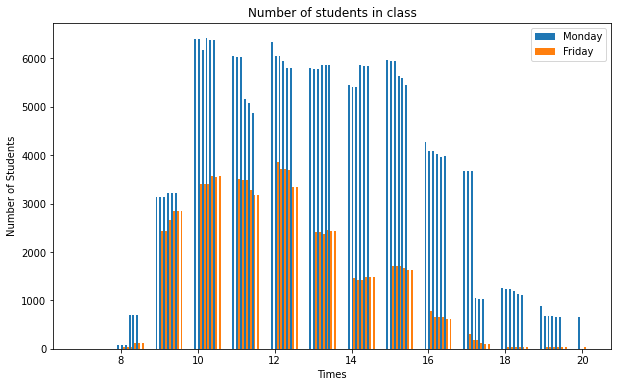

In [79]:
df_times_monday = df_times[df_times['day of week']=="M"]
df_times_tuesday = df_times[df_times['day of week']=="F"]
X = list(df_times_monday['time of day'])
Monday = list(df_times_monday['people in class'])
Tuesday = list(df_times_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.075, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.075, Tuesday, width = 0.05, label = 'Friday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students in class")
plt.legend()
plt.show()

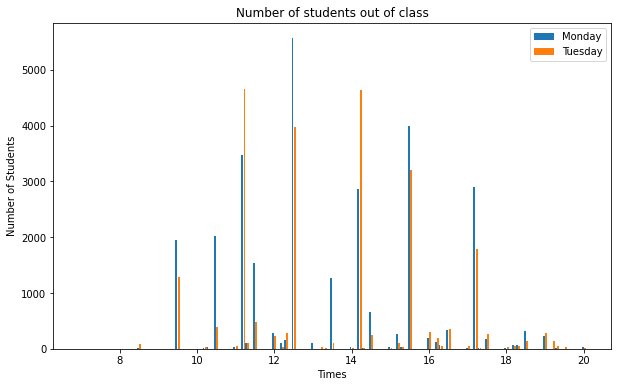

In [47]:
df_times_out_monday = df_out_times[df_out_times['day of week']=="M"]
df_times_out_tuesday = df_out_times[df_out_times['day of week']=="T"]
X = list(df_times_out_monday['time of day'])
Monday = list(df_times_out_monday['people in class'])
Tuesday = list(df_times_out_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.03, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.03, Tuesday, width = 0.05, label = 'Tuesday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students out of class")
plt.legend()
plt.show()

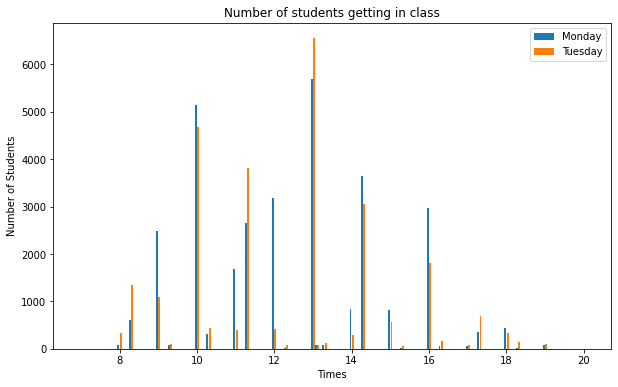

In [48]:
df_times_in_monday = df_in_times[df_in_times['day of week']=="M"]
df_times_in_tuesday = df_in_times[df_in_times['day of week']=="T"]
X = list(df_times_in_monday['time of day'])
Monday = list(df_times_in_monday['people in class'])
Tuesday = list(df_times_in_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.03, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.03, Tuesday, width = 0.05, label = 'Tuesday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students getting in class")
plt.legend()
plt.show()

In [49]:
#need to create table to specify by building as well as day
#fields of the table should be (time of day, number of students(either in class or getting out), building, day of week)
b_set = set()#list of all individual buildings in the df
for index,row, in df_filtered.iterrows():
    for building in row[-1]:
        b_set.add(building)
b_list = list(b_set)
b_list.sort()

In [50]:
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
df_in_buildings = pd.DataFrame()
dfs_times_new = []
dfs_in_new = []
dfs_out_new = []
counter = 0
#structure of dfs_test should be a 3d array with outer len = 73 (buildings), middle length = 5 (days of week), inner length 
#92 (all time periods possible)

#construct the entire array first
buildings_to_index = {}#dictionary to map the buildings to their index in dfs_test_new
for i in range(len(b_list)):
    buildings_to_index[b_list[i]] = i
    dfs_times_new.append([])
    dfs_in_new.append([])
    dfs_out_new.append([])
    for j in range(5):
        dfs_times_new[-1].append([])
        dfs_in_new[-1].append([])
        dfs_out_new[-1].append([])
        for k in range(len(poss_times)):
            dfs_times_new[-1][-1].append(0)
            dfs_in_new[-1][-1].append(0)
            dfs_out_new[-1][-1].append(0)

for index,row in df_filtered.iterrows():
    b = row[-1][0]
    #for b in row[-1]:#double counting because classes held in multiple buildings count more than once (so just do the first
        #building for now)
        #go through all the buildings in the list
    index = buildings_to_index[b]
    counter = 0
#         print(dfs_test_new[index][1][counter])
    for i in poss_times:
        for j in range(len(row[10])):
            if i>=row[10][j] and i<=row[11][j]:
                if row[5]==1:
                    dfs_times_new[index][0][counter] = dfs_times_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_times_new[index][1][counter] = dfs_times_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_times_new[index][2][counter] = dfs_times_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_times_new[index][3][counter] = dfs_times_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_times_new[index][4][counter] = dfs_times_new[index][4][counter] + row[1]
            if (i==row[11][j]):
                if row[5]==1:
                    dfs_out_new[index][0][counter] = dfs_out_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_out_new[index][1][counter] = dfs_out_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_out_new[index][2][counter] = dfs_out_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_out_new[index][3][counter] = dfs_out_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_out_new[index][4][counter] = dfs_out_new[index][4][counter] + row[1]
            if (i==row[10][j]):
                if row[5]==1:
                    dfs_in_new[index][0][counter] = dfs_in_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_in_new[index][1][counter] = dfs_in_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_in_new[index][2][counter] = dfs_in_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_in_new[index][3][counter] = dfs_in_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_in_new[index][4][counter] = dfs_in_new[index][4][counter] + row[1]
        counter = counter +1

In [51]:
time = 11.2
total_students = 0
for index,row in df_filtered.iterrows():
    for j in range(len(row[10])):
        if time >= row[10][j] and time <= row[11][j] and row[5]==1:
            total_students = total_students + row[1]
print(total_students)

6023


In [52]:
df_times_buildings = pd.DataFrame()
df_in_buildings = pd.DataFrame()
df_out_buildings = pd.DataFrame()
#structure of the dataframe is time, building, students, day of week
build_counter = 0
for i in b_list:#each building
    counter = 0
    for j in ['M','T','W','H','F']:#each day of week
        build_time_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_times_new[build_counter][counter]}
        build_in_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_in_new[build_counter][counter]}
        build_out_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_out_new[build_counter][counter]}
        
        df_times_temp = pd.DataFrame(data = build_time_data)
        df_in_temp = pd.DataFrame(data = build_in_data)
        df_out_temp = pd.DataFrame(data = build_out_data)
        
        df_times_buildings = pd.concat([df_times_buildings, df_times_temp], ignore_index = True, axis = 0)
        df_in_buildings = pd.concat([df_in_buildings, df_in_temp], ignore_index = True, axis = 0)
        df_out_buildings = pd.concat([df_out_buildings, df_out_temp], ignore_index = True, axis = 0)
        
        counter = counter+1
    build_counter = build_counter +1

In [53]:
df_times_buildings.sort_values(by=['people in class'], ascending = False).head(20)

,time of day,building,day of week,people in class
22312,12.4,Simon,W,1469
22313,12.5,Simon,W,1469
22311,12.3,Simon,W,1469
22310,12.2,Simon,W,1469
22309,12.1,Simon,W,1469
22308,12.0,Simon,W,1469
22150,12.0,Simon,M,1369
22151,12.1,Simon,M,1369
22152,12.2,Simon,M,1369
22153,12.3,Simon,M,1369


In [85]:
df_times_out_Seigle_M = df_out_buildings[(df_out_buildings['building']=='Crow') & (df_out_buildings['day of week']=='M')]
df_times_out_Seigle_T = df_out_buildings[(df_out_buildings['building']=='Crow') & (df_out_buildings['day of week']=='T')]

In [86]:
df_times_Seigle_M = df_times_buildings[(df_times_buildings['building']=='Crow') & (df_times_buildings['day of week']=='M')]
df_times_Seigle_T = df_times_buildings[(df_times_buildings['building']=='Crow') & (df_times_buildings['day of week']=='T')]

In [87]:
df_times_Seigle_M

,time of day,building,day of week,people in class
5530,7.0,Crow,M,0
5531,7.1,Crow,M,0
5532,7.2,Crow,M,0
5533,7.3,Crow,M,0
5534,7.4,Crow,M,0
...,...,...,...,...
5604,19.2,Crow,M,94
5605,19.3,Crow,M,94
5606,19.4,Crow,M,94
5607,19.5,Crow,M,94


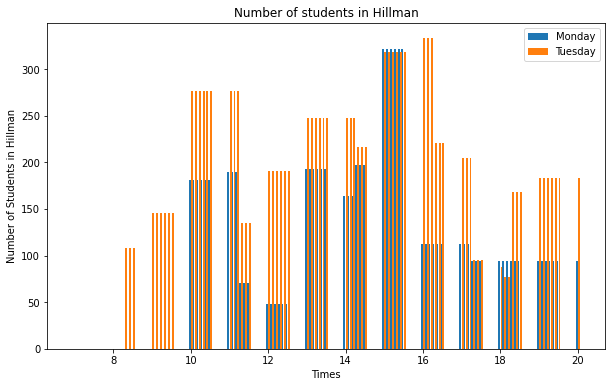

In [88]:
plt.figure(figsize=(10,6))
plt.bar(np.array(poss_times) - 0.03, list(df_times_Seigle_M['people in class']), width= 0.05, label = 'Monday')
plt.bar(np.array(poss_times) + 0.03, list(df_times_Seigle_T['people in class']), width= 0.05, label = 'Tuesday')
plt.xlabel("Times")
plt.ylabel("Number of Students in Hillman")
plt.title("Number of students in Hillman")
plt.legend()
plt.show()

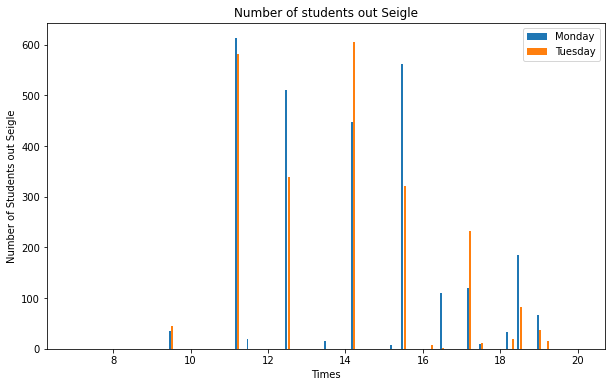

In [58]:
plt.figure(figsize=(10,6))
plt.bar(np.array(poss_times) - 0.03, list(df_times_out_Seigle_M['people in class']), width= 0.05, label = 'Monday')
plt.bar(np.array(poss_times) + 0.03, list(df_times_out_Seigle_T['people in class']), width= 0.05, label = 'Tuesday')
plt.xlabel("Times")
plt.ylabel("Number of Students out Seigle")
plt.title("Number of students out Seigle")
plt.legend()
plt.show()

In [59]:
df_times_out_Seigle = df_out_buildings[df_out_buildings['building']=='Seigle']
df_times_out_Seigle.sort_values(by=['people in class'], ascending = False)

,time of day,building,day of week,people in class
21514,11.2,Seigle,W,613
21356,11.2,Seigle,M,613
21611,14.2,Seigle,H,606
21453,14.2,Seigle,T,606
21541,15.5,Seigle,W,595
...,...,...,...,...
21469,17.0,Seigle,T,0
21467,16.4,Seigle,T,0
21466,16.3,Seigle,T,0
21464,16.1,Seigle,T,0


In [60]:
b_list_dist = b_list.copy()
b_list_dist[13] = "Childrens Hosp"

In [61]:
#make the distance metric value to compare against the getting out of class table in order to gage the best time to get 
#food (also take into account the total number of people in class as a basic heuristic value to compare agaisnt for each
#location)

#main locations to consider: duc, subway, parkside, stanleys, hillman 
#(don't really need to consider bd and village bc not on main campus)
#if it's not in the dictionary then it's too far away to matter
building_coords = {}#dictionary mapping the name of a building to their longitude and latitude for distance metrics
building_coords['Seigle'] = (38.6489757103872, -90.31253449514298)
building_coords['Sever'] = (38.64880664790698, -90.30636882508318)
building_coords['Simon'] = (38.64809429249023, -90.31151076902412)
building_coords['Somers Family'] = (38.64706074307072, -90.3075314786274)
building_coords['Steinberg'] = (38.64662124294788, -90.3028256012481)
building_coords['Stix'] = (38.64630355561184, -90.30992056963892)
building_coords['Sumers Rec Ctr'] = (38.64916959551788, -90.31494068156066)
building_coords['Tietjens Hall'] = (38.6465562265337, -90.31185560680298) #on the 40 so most likely bd?
building_coords['Umrath'] = (38.648039208813664, -90.30978788194473)
building_coords['Urbauer'] = (38.64938765606241, -90.30609664410252)
building_coords['Village House'] = (38.65062405098924, -90.31403151310118)
building_coords['Walker Hall'] = (38.646900730924614, -90.30203438264236)
building_coords['Weil'] = (38.64715970505448, -90.30340670374875)
building_coords['Whitaker'] = (38.64913889368239, -90.30306353125407)
building_coords['Wilson'] = (38.64756768176247, -90.30689080296298)
building_coords['Wom Bldg'] = (38.649375370574425, -90.3084080954738)
building_coords['Wrighton'] = (38.64950433830907, -90.30909643494192)
building_coords['Hillman'] = (38.64680329487367, -90.30468053289408)
building_coords['January Hall'] = (38.647745302479755, -90.30626654605965)
building_coords['Jolley'] = (38.649436402432144, -90.30658541830253)
building_coords['Jubel'] = (38.64853482366569, -90.30340431476512)
building_coords['Kemper'] = (38.647128935903844, -90.30255967301953)
building_coords['Life Sciences'] = (38.64748910829787, -90.30862351265318)
building_coords['Lopata Hall'] = (38.64913374919456, -90.30624457036083)
building_coords['Lopata House'] = (38.651206924331426, -90.31464727847194)
building_coords['Louderman'] = (38.64936280518315, -90.30776452722941)
building_coords['Mallinckrodt'] = (38.64756778721439, -90.3098283709841)
building_coords['McDonnell'] = (38.647198166478354, -90.30667663634529)
building_coords['McMillan'] = (38.64961619005814, -90.3099572694533)
building_coords['McMillen'] = (38.64958718681266, -90.30764730586894)
building_coords['Rebstock'] = (38.647617428614964, -90.30800861426832)
building_coords['Ridgley'] = (38.64814428534339, -90.30615887118805)
building_coords['Rudolph'] = (38.64910733422008, -90.3045729565636)
building_coords['S40 Lien'] = (38.64558682492122, -90.31313605603043) #on the 40 so most likely bd?
building_coords['Schnuck Pav'] = (38.64835153765837, -90.30381660489542)
building_coords['4444 Forst Pk'] = (38.65096295845705, -90.31128863128923)
building_coords['AB Law Bldg'] = (38.64970424789789, -90.3120652552937)
building_coords['Academy Bldg'] = (38.65056163999334, -90.30724468157092)
building_coords['Athletic Complx'] = (38.64971024933669, -90.31460259401626)
building_coords['Bauer'] = (38.649607157655296, -90.31070317578448)
building_coords['Bixby'] = (38.646547794034305, -90.30203998403309)
building_coords['Brauer Hall'] = (38.648942110892435, -90.30226246619063)
building_coords['Brown'] = (38.6471545768611, -90.30565232009128)
building_coords['Busch'] = (38.64751245066617, -90.30581849349812)
building_coords['Busch Lab'] = (38.647743397440074, -90.30861966090147)
building_coords['Crow'] = (38.648993734250745, -90.3055044669093)
building_coords['Cupples I'] = (38.64867351972644, -90.30552727010739)
building_coords['Cupples II'] = (38.64916534876489, -90.30684974096035)
building_coords['Danforth Ctr'] = (38.647705605926426, -90.31044674718503)
building_coords['Duncker'] = (38.648526547987856, -90.30618415924276)
building_coords['Eads'] = (38.648216273947064, -90.30692420657147)
building_coords['Gaylord'] = (38.646354248197255, -90.31121886172929)
building_coords['Givens'] = (38.64665970466113, -90.30354787555484)
building_coords['Goldfarb'] = (38.646976153871, -90.30596735652207)
building_coords['Green Hall'] = (38.648827011272424, -90.30146140112399)

In [62]:
eating = ['Hillman Food', 'DUC', 'Subway', 'Parkside', 'Whispers','Stanleys', 'Law Cafe', 'Bytes']
building_coords['Hillman Food'] = (38.64680329487360, -90.30468053289403)
building_coords['DUC'] = (38.64776873704934, -90.31029667741174)
building_coords['Subway'] = (38.64773399328886, -90.30916598570988)
building_coords['Parkside'] = (38.64841996141208, -90.30378413029605)
building_coords['Whispers'] = (38.64846593242118, -90.30748155757944)
building_coords['Stanleys'] = (38.649382289575726, -90.30590039275175)
building_coords['Law Cafe'] = (38.649675101147665, -90.3120365530795)
building_coords['Bytes'] = (38.64823465326064, -90.3013329259965)

In [63]:
df_food_dist = pd.DataFrame()
for food in eating:
    dists = []
    valid_b = []
    for b in b_list:
        if b in building_coords:#otherwise too far away to care
            dists.append((geopy.distance.geodesic(building_coords[food], building_coords[b]).m))
            valid_b.append(b)
    eating_dist_data = {'place to eat' : [food] * len(valid_b), 'building' : valid_b, 'distance' : dists}
    df_temp = pd.DataFrame(data = eating_dist_data)
    df_food_dist = pd.concat([df_food_dist, df_temp], ignore_index=True, axis = 0)

In [64]:
geopy.distance.geodesic(building_coords['Whitaker'], building_coords['DUC']).m

647.7798548167593

In [65]:
df_food_dist.sort_values(by=['distance'])

,place to eat,building,distance
20,Hillman Food,Hillman,9.818242e-09
331,Law Cafe,AB Law Bldg,4.087992e+00
202,Parkside,Schnuck Pav,8.104677e+00
68,DUC,Danforth Ctr,1.482523e+01
322,Stanleys,Urbauer,1.709451e+01
...,...,...,...
421,Bytes,S40 Lien,1.068739e+03
433,Bytes,Village House,1.136817e+03
388,Bytes,Athletic Complx,1.166718e+03
429,Bytes,Sumers Rec Ctr,1.189136e+03


In [66]:
#make a table looking at each building figuring out what is closest (small input in terms of the value calculations)
df_food_closest = pd.DataFrame()
valid_b = []
min_food_list = []
for b in b_list:
    if b in building_coords:#otherwise too far to care
        valid_b.append(b)
        min_food_dist = float("inf")
        min_food_index = -1
        counter = 0
        for food in eating:
            if (geopy.distance.geodesic(building_coords[food], building_coords[b]).m) < min_food_dist:
                min_food_dist = geopy.distance.geodesic(building_coords[food], building_coords[b]).m
                min_food_index = counter
            counter = counter +1
        min_food_list.append(eating[min_food_index])
eating__min_dist_data = {'building' : valid_b, 'closest food' : min_food_list}
df_temp = pd.DataFrame(data = eating__min_dist_data)
df_food_closest = pd.concat([df_food_closest, df_temp], ignore_index=True, axis = 0)

In [67]:
#have to account for when the different eating places are open
eating_hours = {}#dictionary mapping each eating place to the hours its open for (approximately)
# eating = ['Hillman Food', 'DUC', 'Subway', 'Parkside', 'Whispers','Stanleys', 'Law Cafe', 'Bytes']
eating_hours['Hillman Food'] = (8,14)
eating_hours['DUC'] = (10,15)
eating_hours['Subway'] = (10,18)
eating_hours['Parkside'] = (10,15)
eating_hours['Whispers'] = (8.3,24)
eating_hours['Stanleys'] = (10.3,16)
eating_hours['Law Cafe'] = (7.3,14)
eating_hours['Bytes'] = (9,18)

In [68]:
df_temp = df_out_buildings[df_out_buildings['building']=='Simon']
df_temp = df_temp[df_temp['day of week']=='M']
df_out_buildings.sort_values(by=['people in class'], ascending = False).head(20)

,time of day,building,day of week,people in class
22313,12.5,Simon,W,1469
22155,12.5,Simon,M,1369
22471,12.5,Simon,F,1336
22340,17.2,Simon,W,983
22182,17.2,Simon,M,962
21514,11.2,Seigle,W,613
21356,11.2,Seigle,M,613
22301,10.5,Simon,W,611
22143,10.5,Simon,M,611
21611,14.2,Seigle,H,606


In [69]:
df_duc_temp = df_food_dist[df_food_dist['place to eat']=='DUC']
df_duc_temp = df_duc_temp[df_duc_temp['distance']<600]
np.median(np.array(list(df_duc_temp['distance'])))
               

337.752515428412

In [70]:
df_time_out_temp = df_out_buildings[df_out_buildings['time of day']==12.5]
# df_time_out_temp = df_time_out_temp[df_time_out_temp['time of day']<=13]
df_time_out_temp.sort_values(by=['people in class'], ascending=False).head()

,time of day,building,day of week,people in class
22313,12.5,Simon,W,1469
22155,12.5,Simon,M,1369
22471,12.5,Simon,F,1336
21523,12.5,Seigle,W,512
21365,12.5,Seigle,M,511


In [71]:
#Value function that will take in as parameters: time, day of the week and tell you a prediction of how busy each of the 
#dining places will be
#traffic function (preliminariy model will just take into account the number of people that get out of the surrounding buildings)
#and be proportional to 1/dist to that building (model as linearly decreasing with respect to distance)
time = 13
d_week = "T"
#df_food_dist data frame for each food place and distance from each building to it
#df_times_out_buildings df for each building and the number of kids that get out at each time interval
#df_times df for the number of kids in class at each time interval (use as rough heuristic?)
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
def get_traffic(time, d_week):
    
    #preliminary traffic function (still need to take into account varying capacity for each
    #restraunt as well as hours of operation affect traffic flow, and possibly restraunt with min dist getting a boost)
    
    busy_value = []#list of how busy each place will be 
    mod_poss_times = [x for x in list(np.linspace(time-1,time,10, endpoint=False)) if (round(math.modf(x)[0],1) < 0.6)]
    for food in eating:#go through every place available for food
        total_students = 0
        for b in b_list:
            if b in building_coords:
                dist = geopy.distance.geodesic(building_coords[b], building_coords[food]).m
                if dist < 600:#capping at 600
                    df_temp = df_out_buildings[df_out_buildings['building']==b]
                    df_temp = df_temp[df_temp['day of week']==d_week]
                    student_times = list(df_temp['people in class'])
                    index = poss_times.index(round(time-1,1))
                    for i in range((6)):#iterate through the times and find the number of kids getting out at those times modified by the amount of time to current time
    #                     print("time is ", poss_times[index])
                        total_students = total_students + student_times[index] * (.5 + (i * (.5/6)))#adjustment factor
                        index = index +1
                #total students must now be manipulated by the distance factor
                total_students = total_students * (1/((dist) * (.01)))
        busy_value.append((food, total_students))
    return busy_value

In [91]:
df_busy = pd.DataFrame()
food_times = [round(x,1) for x in list(np.linspace(10,17,70)) if (round(math.modf(x)[0],1) < 0.6)]
for i in food_times:
#     i = round(i,1)
    for day in ['M','T','W','H','F']:
        busy_values = get_traffic(i,day)
        eating = []
        busy = []
        for vals in busy_values:
            eating.append(vals[0])
            busy.append(vals[1])
        eating_traffic = {'eating place' : eating, 'busy metric' : busy, 'time of day' : [i] * len(busy_values), 'day of week' : [day] * len(busy_values)}
        df_temp = pd.DataFrame(data = eating_traffic)
        df_busy = pd.concat([df_busy, df_temp], ignore_index = True, axis=  0)

In [89]:
df_busy_duc = df_busy[df_busy['eating place']=='Duc']
df_busy_duc_T = df_busy_duc[df_busy_duc['day of week']=='M']

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (39,) and arg 1 with shape (0,).

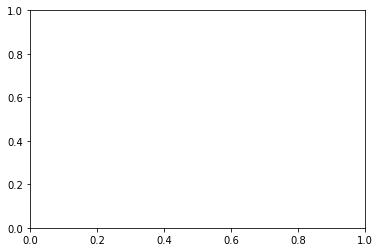

In [90]:
plt.bar(food_times, list(df_busy_duc_T['busy metric']), width = 0.05)

In [75]:
df_in_buildings

,time of day,building,day of week,people in class
0,7.0,(None),M,0
1,7.1,(None),M,0
2,7.2,(None),M,0
3,7.3,(None),M,0
4,7.4,(None),M,0
...,...,...,...,...
28830,19.2,Wrighton,F,0
28831,19.3,Wrighton,F,0
28832,19.4,Wrighton,F,0
28833,19.5,Wrighton,F,0


In [76]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("food_busy.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_busy.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()


In [77]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("in_class.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_times_buildings.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()

In [78]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("out_of_class.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_out_buildings.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()

In [285]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("going_to_class.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_in_buildings.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()